### Setup Path

In [1]:
import sys
import os

notebook_dir = os.path.dirname(os.path.abspath('train_from_tensor.ipynb'))
project_root = os.path.dirname(notebook_dir)
sys.path.append(project_root)

### Import Modules

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from models import simple_models
from utils.trainer import Trainer

In [3]:
torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Generate Data

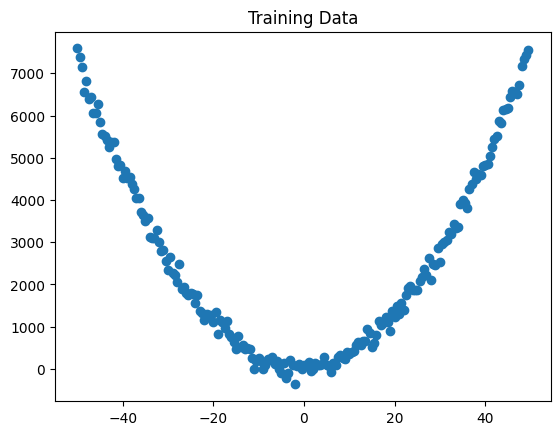

In [4]:
# Gen data
X = (torch.arange(-50, 50, 0.5)).reshape(-1, 1)
y = (X**2) * 3 + X * 4 + torch.randn(X.size()) * 150

X_train = X.to(device)
y_train = y.to(device)

plt.title("Training Data")
plt.scatter(X, y)
plt.show()

### Setup Trainer

In [5]:
# Setup model, optimizer and loss function
model = simple_models.RegressionMLP().to(device)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

# Setup trainer
trainer = Trainer(model, optimizer, loss_fn, device)

### Train Model

In [6]:
# Training
trainer.fit_tensor(X_train, y_train, 500)

Training: 100%|██████████| 500/500 [00:01<00:00, 386.53epoch/s, loss=6.95e+5]


Training Loss: 6.947e+05


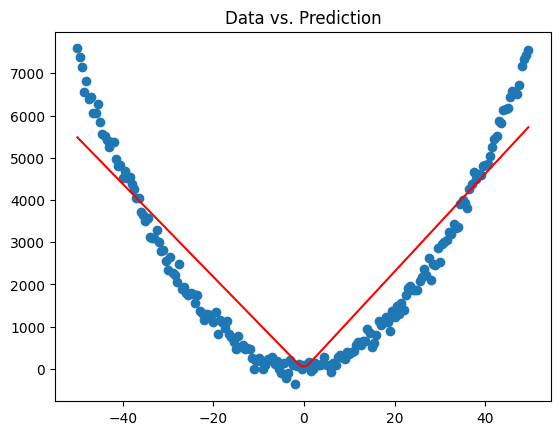

In [7]:
with torch.no_grad():
    prediction = model(X_train)
    loss = loss_fn(prediction, y_train).cpu().item()

print(f"Training Loss: {loss:.4}")

plt.title("Data vs. Prediction")
plt.scatter(X.cpu(), y.cpu())
plt.plot(X.cpu(), prediction.cpu(), c='red')